**Elijah Taber**

**PH 322 - Computational Physics**

**May 17, 2021**

**Exercise 7.3**

In the on-line resources you will find files called _piano.txt_ and _trumpet.txt_, which contain data representing the waveform of a single note, played on, respectively, a piano and a trumpet.

**a)** 
Write a program that loads a waveform from one of these files, plots it, then calculates its discrete Fourier transform and plots the magnitudes of the first 10,000 coefficients in a manner similar to Fig. 7.4.  Note that you will have to use a fast Fourier transform for the calculation because there are too many samples in the files to do the transforms the slow way in any reasonable amount of time.

Apply your program to the piano and trumpet waveforms and discuss briefly what one can conclude about the sound of the piano and trumpet from the plots of Fourier coefficients.

**b)** 
Both waveforms were recorded at the industry-standard rate of 44,100 samples per second and both instruments were playing the same musical note when the recordings were made.  From your Fourier transform results calculate what note they were playing.  (Hint: The musical note middle C has a frequency of 261 Hz.)

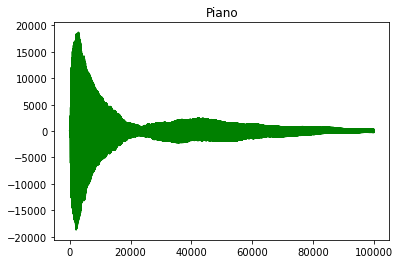

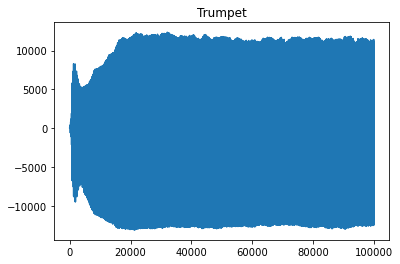

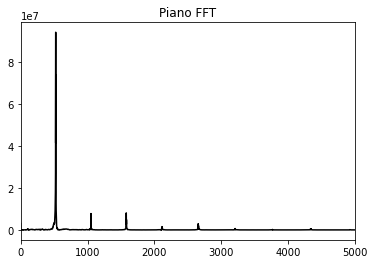

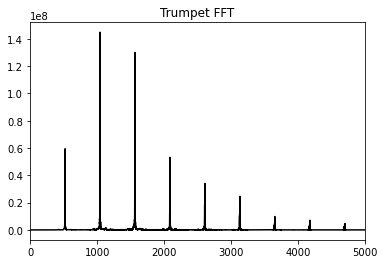


525.231
1043.847


    The max frequencies for both the piano and trumpet are around 
    multiples of 261 Hz, which from my understanding of very little in 
    musical notes, implies that both instruments are playing the note C, 
    but are in different octaves.


In [81]:
"""
Exercise 7.3
"""

from numpy.fft import rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt

#Part a

# Loading waveform data txt into numpy arrays
piano = np.loadtxt(r'C:\Users\Elijah Taber\Downloads\piano.txt')
trumpet = np.loadtxt(r'C:\Users\Elijah Taber\Downloads\trumpet.txt')

plt.plot(piano, 'g')
plt.title("Piano")
plt.show()
plt.plot(trumpet)
plt.title("Trumpet")
plt.show()

# Fourier transforms

piano_fft = rfft(piano)
piano_freq = rfftfreq(len(piano), d = 1/44100.)
trumpet_fft = rfft(trumpet)
trumpet_freq = rfftfreq(len(trumpet), d = 1/44100.)

# Plotting of fourier transforms

plt.plot(piano_freq, abs(piano_fft), 'k')
plt.title('Piano FFT')
plt.xlim(0, 5000)
plt.show()
plt.plot(trumpet_freq, abs(trumpet_fft), 'k')
plt.title('Trumpet FFT')
plt.xlim(0, 5000)
plt.show()

max_piano_freq = piano_freq[np.argmax(piano_fft)]
max_trumpet_freq = piano_freq[np.argmax(trumpet_fft)]

#Part b
print()
print(max_piano_freq)
print(max_trumpet_freq)
print()
print("""
    The max frequencies for both the piano and trumpet are around 
    multiples of 261 Hz, which from my understanding of very little in 
    musical notes, implies that both instruments are playing the note C, 
    but are in different octaves.
    """)

**Exercise 7.6**

Exercise 7.4 looked at data representing the variation of the Dow Jones Industrial Average, colloquially called "the Dow," over time.  The particular time period studied in that exercise was special in one sense: the value of the Dow at the end of the period was almost the same as at the start, so the function was, roughly speaking, periodic.  In the on-line resources there is another file called _dow2.txt_, which also contains data on the Dow but for a different time period, from 2004 until 2008. Over this period the value changed considerably from a starting level around 9000 to a final level around 14000.

**a)**
Write a program similar to the one for Exercise 7.4, part (e), in which you read the data in the file _dow2.txt_ and plot it on a graph.  Then smooth the data by calculating its Fourier transform, setting all but the first 2\% of the coefficients to zero, and inverting the transform again, plotting the result on the same graph as the original data.  As in Exercise 7.4 you should see that the data are smoothed, but now there will be an additional artifact.  At the beginning and end of the plot you should see large deviations away from the true smoothed function.  These occur because the function is required to be periodic---its last value must be the same as its first---so it needs to deviate substantially from the correct value to make the two ends of the function meet.  In some situations (including this one) this behavior is unsatisfactory.  If we want to use the Fourier transform for smoothing, we would certainly prefer that it not introduce artifacts of this kind.

Make sure your program outputs the original and smoothed data on the same plot, with legend and title indicating its the DFT. 

**b)** 
Modify your program to repeat the same analysis using discrete cosine transforms.  You can use the functions from _dcst.py_ to perform the transforms if you wish.  Again discard all but the first 2\% of the coefficients, invert the transform, and plot the result.  You should see a significant improvement, with less distortion of the function at the ends of the interval.  This occurs because, as discussed at the end of Section 7.3, the cosine transform does not force the value of the function to be the same at both ends.

Make sure your program outputs the original and smoothed data on the same plot, with legend and title indicating its the DCT.

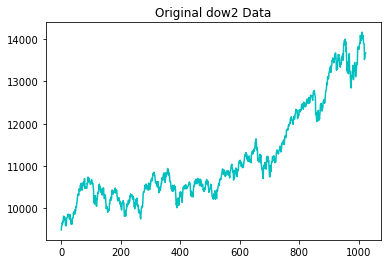

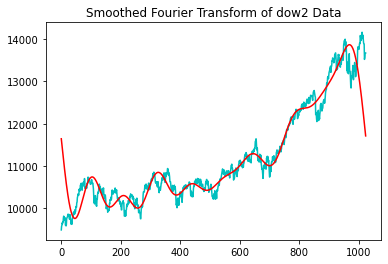

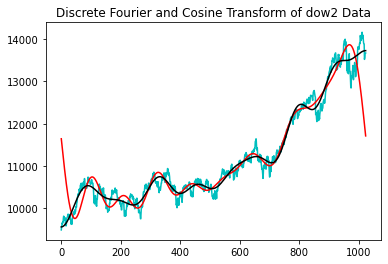

In [50]:
"""
Exercise 7.6
"""

from numpy import linspace, array, zeros, copy, loadtxt
from scipy.fftpack import rfft, irfft, dct, idct
from matplotlib.pyplot import plot, show, xlabel, ylabel, title, legend

# Part a

# Loading dow2 txt into numpy array
dow2 = loadtxt(r'C:\Users\Elijah Taber\Downloads\dow2.txt', float)
plot(dow2, 'c')
title('Original dow2 Data')
show()

# Discrete Fourier transform
fourier_trans = rfft(dow2)
N = len(fourier_trans)
two_percent = zeros(N, float)
two_percent[0 : int(N / 50)] = copy(fourier_trans[0 : int(N / 50)])
smoothed_fourier = irfft(two_percent)

#Plotting smoothed fourier transform over original
plot(dow2, 'c')
plot(smoothed_dow2, 'r')
title('Smoothed Fourier Transform of dow2 Data')
show()

# Part b

# Discrete cosine transform
# Factors 1 / 2n to smooth and normalize
cos_trans = dct(dow2)
n = len(dow2_cos)
cos_two_percent = zeros(n, float)
cos_two_percent[0 : int(n / 50)] = copy(cos_trans[0 : int(n / 50)])
smoothed_cos = idct(cos_two_percent) / (2*n)

#Plotting both fourier and cosine transform
plot(dow2, 'c', label="Original")
plot(smoothed_fourier, 'r', label="Fourier")
plot(smoothed_cos, 'k', label="Cosine")
title('Discrete Fourier and Cosine Transform of dow2 Data')
show()

**Exercise 7.9**

Refer to your textbook for the setup context of this Exercise.

**a)** 
On the web site you will find a file called _blur.txt_ that contains a grid of values representing brightness on a black-and-white photo---a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma=25$.  Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot.  You should see the photo appear.  If you get something wrong it might be upside-down.  Work with the details of your program until you get it appearing correctly.  (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)

**b)** 
Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian $f(x,y)$ above with $\sigma=25$.  Make a density plot of these values on the screen too, so that you get a visualization of your point spread function.  Remember that the point spread function is periodic (along both axes), which means that the values for negative $x$ and $y$ are repeated at the end of the interval.  Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture (refer to your textbook for an image reference).

Hint: It is important that your point spread function looks like the one in the textbook. The psf is essentially symmetric about the midpoint in each dimension. 

**c)**
Combine your two programs and add Fourier transforms using the functions _rfft2_ and _irfft2_ from _numpy.fft_, to make a program that does the following:

i) Reads in the blurred photo

ii) Calculates the point spread function

iii) Fourier transforms both

iv) Divides one by the other

v) Performs an inverse transform to get the unblurred photo

vi) Displays the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp.

Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero.  In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very large number (because you're dividing by something small).  A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it---just leave that coefficient alone.  The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$.

**d)**
Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo?  Why can we not perfectly unblur any photo and make it completely sharp?

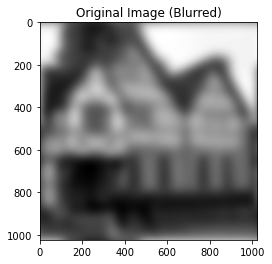

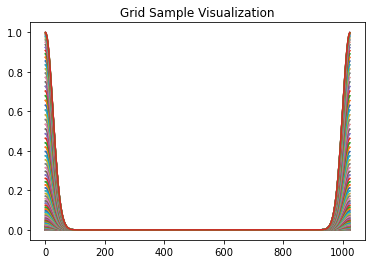

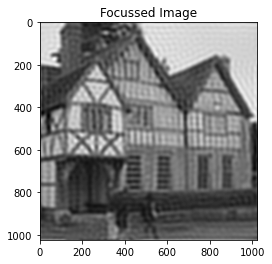


    Part D: 
    
    When the numbers calculated by the point spread function are 
    small enough, the ability to accurately store their values 
    as floating point numbers. Due to this, the fft of the point 
    spread function is not as accurate as it should 
    be, in theory, therfore the unblurred image is not equivalent to
    the original image.
    


In [71]:
"""
Exercise 7.9
"""

from scipy.fft import fft2, ifft2
from numpy import loadtxt, exp, empty, real
from numpy.fft import rfft2, irfft2
from matplotlib.pyplot import imshow, plot, show, title

# Part a

# Initialize and plot
sigma = 25
blur = loadtxt(r'C:\Users\Elijah Taber\Downloads\blur.txt', float)
imshow(blur)
title('Original Image (Blurred)')
show()
y_in, x_in = blur.shape

# Part b

sigma = 25

def point_spread(x, y):
    return exp(- ( x ** 2 + y ** 2 ) / (2 * sigma ** 2))


# Determines each point for the spread array
point_spread_function = empty([ y_in, x_in ], float)
for i in range(y_in):
    for j in range(x_in):
        point_spread_function[i, j] = point_spread( (j + y_in / 2) % y_in - y_in / 2, \
                                                 (i + x_in / 2) % x_in - x_in / 2)

# Point spread fourier function
blurred_fourier = rfft2(blur)
point_spread_fourier = rfft2(point_spread_function)
plot(irfft2(point_spread_fourier))
title('Grid Sample Visualization')
show()

#Part c

# Finding oupputs for fourier transform
focussed_fourier = empty([ y_in, x_in // 2 + 1], complex)
epsilon = 10 ** -4

for i in range(x_in // 2 + 1):
    for j in range(y_in):
        if abs(point_spread_fourier[j, i]) < epsilon:
            focussed_fourier[j, i] = blurred_fourier[j, i]
        else:
            focussed_fourier[j, i] = blurred_fourier[j, i] / (point_spread_fourier[j, i])

# Reverse fourier transform and plotting
imshow(irfft2(focussed_fourier))
title('Focussed Image')
show()

#Part d

print('''
    Part D: 
    
    When the numbers calculated by the point spread function are 
    small enough, the ability to accurately store their values 
    as floating point numbers. Due to this, the fft of the point 
    spread function is not as accurate as it should 
    be, in theory, therfore the unblurred image is not equivalent to
    the original image.
    ''')

**Exercise 8.1**

Refer to your textbook the circuit diagram referred to in this exercise.

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows.  Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor.  Then:

\begin{equation*}
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = {d Q\over d t}.
\end{equation*}

Substituting the second equation into the third, then substituting the result into the first equation, we find that $V_\textrm{in} - V_\textrm{out} = RC\>({d V_\textrm{out}/ d t})$, or equivalently

\begin{equation*}
{d V_\textrm{out}\over d t} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
\end{equation*}

**a)**
Write a program (or modify a previous one) to solve this equation for $V_\textrm{out}(t)$ using the fourth-order Runge--Kutta method when in the input signal is a square-wave with frequency 1 and amplitude 1:

\begin{equation*}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation*}

where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.01$, $0.1$, and 1, with initial condition $V_\textrm{out}(0)=0$.  You will have to make a decision about what value of $h$ to use in your calculation.  Small values give more accurate results, but the program will take longer to run.  Try a variety of different values and choose one for your final calculations that seems sensible to you.

Have your program output each plot (should be plotted separately) with RC value clearly labeled. 

**b)** 
Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.

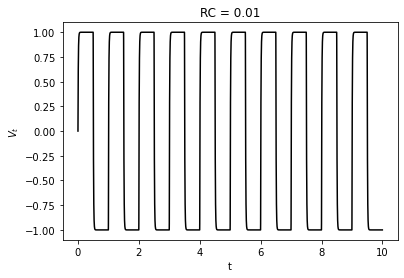

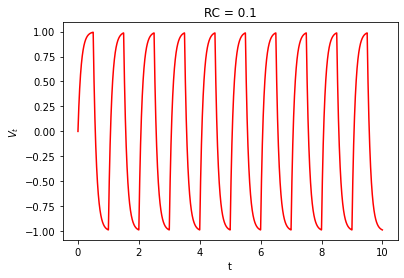

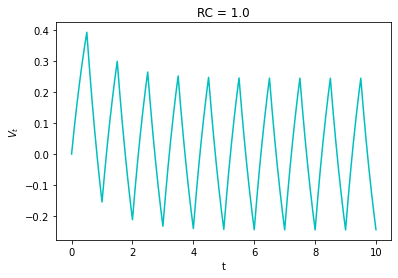



    Part B:
    
    My interpretation of this circuit is that it visualizes the AC signal patterns 
    with varrying RC values. The higher the RC value is, the longer it takes for 
    the voltage to spike, causing smaller volatage outputs (decrease in amplitude)
    due to the increase in the resistor/capacitor values.
    
      


In [84]:
"""
Exercise 8.1
"""

from numpy import arange, empty, floor
from matplotlib.pyplot import plot, show, xlabel, ylabel, title

# Part a

# Initialize
V_out = 0
t_i = 0
t_f = 10
N = 5000  
h = (t_f - t_i) / N  

def signal(t):
    if floor(2 * t) % 2 == 0:
        return 1
    else:
        return -1

def f(V, t, RC):
    return 1 / RC * (signal(t) - V)

#Solving V_out using 4-th order Runge-Kutta
def Runge_Kutta(RC):
    V_N = []
    t_N = arange(t_i, t_f, h)
    V = V_out
    for t in t_N:
        V_N.append(V)
        k1 = h * f(V, t, RC)
        k2 = h * f(V + 0.5 * k1, t + 0.5 * h, RC)
        k3 = h * f(V + 0.5 * k2, t + 0.5 * h, RC)
        k4 = h * f(V + k3, t + h, RC)
        V +=  (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return V_N


t = arange(t_i, t_f, h)
plot(t, Runge_Kutta(0.01), 'k')
xlabel('t')
ylabel(r'$V_t$')
title('RC = 0.01')
show()
plot(t, Runge_Kutta(0.1), 'r')
xlabel('t')
ylabel(r'$V_t$')
title('RC = 0.1')
show()
plot(t, Runge_Kutta(1), 'c')
xlabel('t')
ylabel(r'$V_t$')
title('RC = 1.0')
show()

#Part b

print("""

    Part B:
    
    My interpretation of this circuit is that it visualizes the AC signal patterns 
    with varrying RC values. The higher the RC value is, the longer it takes for 
    the voltage to spike, causing smaller volatage outputs (decrease in amplitude)
    due to the increase in the resistor/capacitor values.
    
      """)

**Exercise 8.2**

The Lotka--Volterra equations are a mathematical model of predator--prey interactions between biological species.  Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators).  You could think of $x$ and $y$ as being the population in thousands, say, so that $x=2$ means there are 2000 rabbits.  Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes.  But 0.001 is a pretty close spacing of values, so it's a decent approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka--Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

\begin{equation*}
{d x\over d t} = \alpha x - \beta xy,
\end{equation*}

where $\alpha$ and $\beta$ are constants.  At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits---because they need food to grow and reproduce---but also die of old age at a rate proportional to their own population:

\begin{equation*}
{d y\over d t} = \gamma xy - \delta y,
\end{equation*}

where $\gamma$ and $\delta$ are also constants.

**a)**
Write a program to solve these equations using the fourth-order Runge--Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and $\delta=2$, starting from the initial condition $x=y=2$.  Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential equations in this case do not depend explicitly on time $t$---in vector notation, the right-hand side of each equation is a function $f(\vec{r})$ with no $t$ dependence.  You may nonetheless find it convenient to define a Python function _f(r,t)_ including the time variable, so that your program takes the same form as programs given earlier in this chapter. You don't have to do it that way, but it can avoid some confusion. Several of the following exercises have a similar lack of explicit time-dependence.)

**b)**
Describe in words what is going on in the system, in terms of rabbits and foxes.

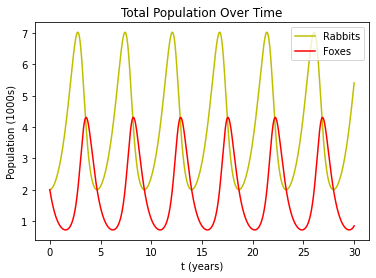

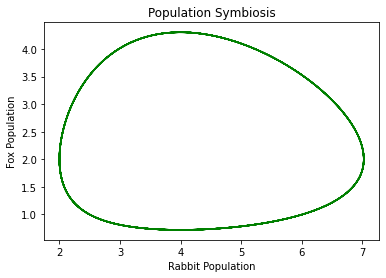


      The visualization of the second graph shows the clear symbiotic relationship
      that the Lotka-Volterra model represents for the rabbit and fox populations.
      The two populations are highly dependent upon one another in a never ending cycle
      where if the population of foxes increases too rapidly, then the population of 
      rabbits will decrease rapidly which then again causes the fox population to drop
      and the rabbit population to again rise. From the first graph, the two populations 
      always seem to be in equilibrium when fox population just reach their maximum as well as
      when the rabbit population just reaches their minimum.
      


In [97]:
"""
Exercise 8.2
"""

from math import sin
import numpy as np
import matplotlib.pyplot as plt

#Part a

# Constants
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

# Initialization
a = 0.0
b = 30.0
N = 10000
h = (b-a)/N
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
x = y = 2.0

# Lotka-Volterra Model
dxdt = lambda x, y: alpha*x - beta*x*y
dydt = lambda x, y: gamma*x*y - delta*y

# Runge-Kutta Function
for t in tpoints:
    xpoints.append(x)
    ypoints.append(y)
    xk1, yk1 = h*dxdt(x, y), h*dydt(x, y)
    xk2, yk2 = h*dxdt(x+0.5*xk1, y+0.5*yk1), h*dydt(x+0.5*xk1, y+0.5*yk1)
    xk3, yk3 = h*dxdt(x+0.5*xk2, y+0.5*yk2), h*dydt(x+0.5*xk2, y+0.5*yk2)
    xk4, yk4 = h*dxdt(x+xk3, y+yk3), h*dydt(x+xk3, y+yk3)
    x += (xk1+2*xk2+2*xk3+xk4)/6
    y += (yk1+2*yk2+2*yk3+yk4)/6

# Plotting total populations with respect to time
plt.plot(tpoints,xpoints,'y', label='Rabbits')
plt.plot(tpoints,ypoints,'r', label='Foxes')
plt.xlabel("t (years)")
plt.ylabel("Population (1000s)")
plt.title("Total Population Over Time")
plt.legend()
plt.show()

# Plotting populations side by side
plt.plot(xpoints, ypoints, 'g')
plt.xlabel("Rabbit Population")
plt.ylabel("Fox Population")
plt.title("Population Symbiosis")
plt.show()

#Part b

print("""
      The visualization of the second graph shows the clear symbiotic relationship
      that the Lotka-Volterra model represents for the rabbit and fox populations.
      The two populations are highly dependent upon one another in a never ending cycle
      where if the population of foxes increases too rapidly, then the population of 
      rabbits will decrease rapidly which then again causes the fox population to drop
      and the rabbit population to again rise. From the first graph, the two populations 
      always seem to be in equilibrium when fox population just reach their maximum as well as
      when the rabbit population just reaches their minimum.
      """)

**Extra Credit**

**Exercise 8.3: The Lorenz equations**

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:
$$
{d x\over d t} = \sigma(y-x),\qquad
{d y\over d t} = rx - y - xz,\qquad
{d z\over d t} = xy - bz,
$$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional---they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of *deterministic chaos*, the occurrence of apparently
random motion even though there is no randomness built into the equations.
We encountered a different example of chaos in the logistic map of
Exercise~3.6.

**Part a)** Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=\frac83$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.)


**Part b)** Modify your program to produce a plot of $z$ against $x$.  You should
  see a picture of the famous ``strange attractor'' of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself.

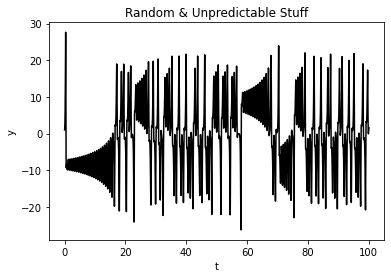

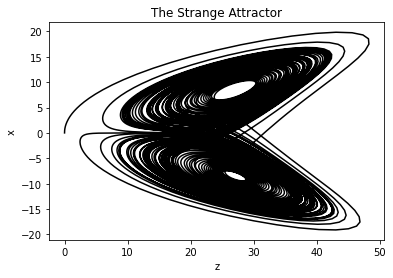

In [102]:
"""
Exercise 8.3
"""

import numpy as np
import matplotlib.pyplot as plt

#Part a

# Constants
sigma = 10
r = 28
b = 8/3

# Lorentz funtion
def Lorentz(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    fx = sigma*(y - x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    return np.array([fx, fy, fz], float)

# Initialization
A = 0.0
B = 100.0
N = 10000
h = (B - A)/N

tpoints = np.arange(A,B,h)
xpoints = []
ypoints = []
zpoints = []

xyz = np.array([0, 1, 0], float)

for t in tpoints:
    # Add point to each list
    xpoints.append(xyz[0])
    ypoints.append(xyz[1])
    zpoints.append(xyz[2])

    #  Runge-Kutta Function
    k1 = h*Lorentz(xyz)
    k2 = h*Lorentz(xyz+0.5*k1)
    k3 = h*Lorentz(xyz+0.5*k2)
    k4 = h*Lorentz(xyz+k3)
    xyz += (k1 + 2*k2 + 2*k3 + k4)/6


plt.plot(tpoints, ypoints, 'k')
plt.title('Random & Unpredictable Stuff')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

plt.plot(zpoints, xpoints, 'k')
plt.title('The Strange Attractor')
plt.xlabel('z')
plt.ylabel('x')
plt.show()

Grade: 110%